### Objective:
To implement the techniques learnt as a part of the course.

### Learning Outcomes:
 Pre-processing of image data.
 Visualization of images.
 Building CNN.
 Evaluate the Model.
 The motive of the project is to make the learners capable to handle images/image classification problems, during this
process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

### Data Description:
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its
unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a phot

In [1]:
!pip install tensorflow==2.0
!pip install keras
!pip install opencv-python

### Import the packages and dataframes that are needed

In [2]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import (
    Dense, 
    Dropout, 
    Flatten, 
    Conv2D, 
    MaxPooling2D, 
    MaxPool2D,
    GlobalMaxPooling2D,
    BatchNormalization
)
print("import completed")

import completed


In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [4]:
df = pd.read_csv('Labels.csv')
np.save('trainLabel.npy', df)
df.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [5]:
trainImg = np.load('images.npy')
trainLabel = np.load('trainLabel.npy', False, True)

trainImg.shape, trainLabel.shape

((4750, 128, 128, 3), (4750, 1))

Image name:Small-flowered Cranesbill


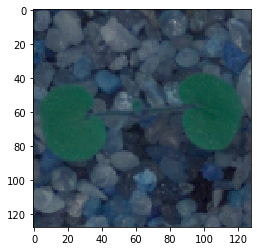

In [6]:
# Check Images
i = 0
img = trainImg[i]
label = trainLabel[0][i]
print(f'Image name:{label}')
plt.imshow(img)

Explanatory Data Analysis

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


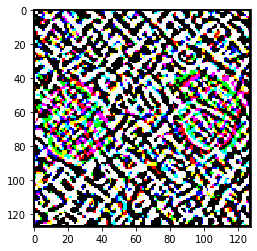

In [7]:
sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)

### Pre-Processing

* The Data to be normalized to 0-1 by dividing values by 255.
* perform train and set split, first run trains and test : 0.30 , Then further split test data into test and validation set with test_size = 0.5

In [8]:
trainImg = trainImg.astype('float32')
trainImg /= 255
print(f'Shape of the Train array:{trainImg.shape}')
print(f'Minimum value in the Train Array:{trainImg.min()}')
print(f'Maximum value in the Train Array:{trainImg.max()}')

Shape of the Train array:(4750, 128, 128, 3)
Minimum value in the Train Array:0.0
Maximum value in the Train Array:1.0


In [9]:
# Step#1: Split train and test set
X_train, X_test, y_train, y_test = train_test_split(trainImg, trainLabel, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((3325, 128, 128, 3), (1425, 128, 128, 3))

In [10]:
# Step#2: Split validation from test set
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_test.shape, X_validation.shape

((712, 128, 128, 3), (713, 128, 128, 3))

In [11]:
#one hot encoding the target values
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
y_validation = encoder.fit_transform(y_validation)

In [12]:
# Display target variable
y_train[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Gaussian Blurring
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied.

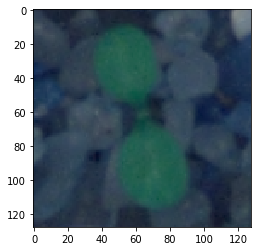

In [13]:
plt.imshow(X_train[1], cmap='gray')

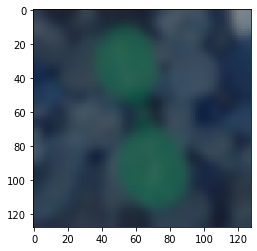

In [14]:
plt.imshow(cv2.GaussianBlur(X_train[1], (15,15), 0))

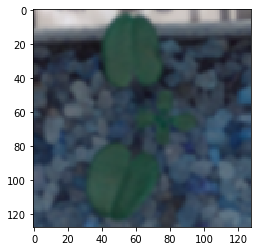

In [15]:
for idx, img in enumerate(X_train):
    X_train[idx] = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(X_train[0], cmap='gray')

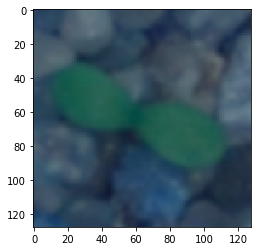

In [16]:
for idx, img in enumerate(X_validation):
    X_validation[idx] = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(X_validation[0], cmap='gray')

### Model Creation and Evaluation

* Initialize CNN Classifier
* Add Convolution layer with 32 kernels of 3x3 shape
* Add Maxpooling layer of size 2x2
* Flatten the input array
* Add dense layer with relu activation function
* Dropout the probability
* Add softmax Dense layer as output

In [17]:
def create_model(input_shape, num_classes):
    model = Sequential()

  # Add convolution layer with 32 filters and 3 kernels
    model.add(Conv2D(32, (3,3), input_shape=input_shape, padding='same', activation=tf.nn.relu))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))

    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation=tf.nn.relu))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation=tf.nn.relu))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))

    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation=tf.nn.relu))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))

  # Flatten the 2D array to 1D array
    model.add(Flatten())

  # Create fully connected layers with 512 units
    model.add(Dense(512, activation=tf.nn.relu))
    model.add(Dropout(0.5))

  # Adding a fully connected layer with 128 neurons
    model.add(Dense(units = 128, activation = tf.nn.relu))
    model.add(Dropout(0.5))

  # The final output layer with 12 neurons to predict the categorical classifcation
    model.add(Dense(units = num_classes, activation = tf.nn.softmax))
    return model

* Sequential: Defines a Sequence of layers
* Conv2D: Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
* MaxPool2D: The objective is to down-sample an input representation
* Flatten: Convert the 2D to 1D array
* Dense: Adds a layers of neurons
* Activation Functions::
* Relu: Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax: takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=10)

In [19]:
input_shape = X_train.shape[1:] # Input shape of X_train
num_classes = y_train.shape[1] # Target column size

model = create_model(input_shape, num_classes)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Optimizer
# optimizer = tf.keras.optimizers.SGD(lr=1 * 1e-1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=30, batch_size=100, callbacks=[callbacks])

Train on 3325 samples, validate on 713 samples
Epoch 1/30
3325/3325 [==============================] - 51s 15ms/sample - loss: 2.4512 - accuracy: 0.1239 - val_loss: 2.4400 - val_accuracy: 0.1262
Epoch 2/30
3325/3325 [==============================] - 47s 14ms/sample - loss: 2.3452 - accuracy: 0.2123 - val_loss: 2.1264 - val_accuracy: 0.2861
Epoch 3/30
3325/3325 [==============================] - 47s 14ms/sample - loss: 1.9941 - accuracy: 0.3221 - val_loss: 1.7845 - val_accuracy: 0.3927
Epoch 4/30
3325/3325 [==============================] - 47s 14ms/sample - loss: 1.7657 - accuracy: 0.3877 - val_loss: 1.5031 - val_accuracy: 0.4909
Epoch 5/30
3325/3325 [==============================] - 48s 14ms/sample - loss: 1.5930 - accuracy: 0.4376 - val_loss: 1.4087 - val_accuracy: 0.5217
Epoch 6/30
3325/3325 [==============================] - 48s 14ms/sample - loss: 1.4716 - accuracy: 0.4908 - val_loss: 1.2174 - val_accuracy: 0.6297
Epoch 7/30
3325/3325 [==============================] - 47s 14ms/

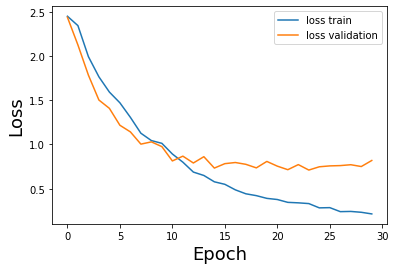

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch', fontsize=18)
plt.ylabel(r'Loss', fontsize=18)
plt.legend(('loss train','loss validation'), loc=0)

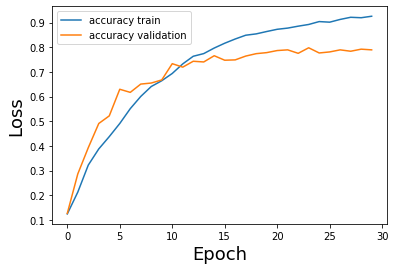

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch', fontsize=18)
plt.ylabel(r'Loss', fontsize=18)
plt.legend(('accuracy train','accuracy validation'), loc=0)

### Model Evaluation

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss: {:.2f} \n Test accuracy: {:.2f}'.format(loss, accuracy))

loss, accuracy = model.evaluate(X_train, y_train)
print('Train loss: {:.2f} \n Train accuracy: {:.2f}'.format(loss, accuracy))

712/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Model is overfitting since training accuracy is 95% and testing accuracy is 81%. 
So based on above epoch results, we can stop the epoch cycles accordingly

In [25]:
model1 = create_model(input_shape, num_classes)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)       

In [26]:
history = model1.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=18, callbacks=[callbacks])

Train on 3325 samples, validate on 713 samples
Epoch 1/18
3325/3325 [==============================] - 55s 17ms/sample - loss: 2.4478 - accuracy: 0.1194 - val_loss: 2.3750 - val_accuracy: 0.2188
Epoch 2/18
3325/3325 [==============================] - 53s 16ms/sample - loss: 2.1270 - accuracy: 0.2878 - val_loss: 1.7731 - val_accuracy: 0.4516
Epoch 3/18
3325/3325 [==============================] - 53s 16ms/sample - loss: 1.7794 - accuracy: 0.3841 - val_loss: 1.5110 - val_accuracy: 0.4867
Epoch 4/18
3325/3325 [==============================] - 53s 16ms/sample - loss: 1.5736 - accuracy: 0.4463 - val_loss: 1.3855 - val_accuracy: 0.5386
Epoch 5/18
3325/3325 [==============================] - 56s 17ms/sample - loss: 1.3588 - accuracy: 0.5341 - val_loss: 1.1219 - val_accuracy: 0.6353
Epoch 6/18
3325/3325 [==============================] - 51s 15ms/sample - loss: 1.1469 - accuracy: 0.6015 - val_loss: 1.0227 - val_accuracy: 0.6494
Epoch 7/18
3325/3325 [==============================] - 50s 15ms/

### Confusion Matrix

In [27]:
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5) 

In [30]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

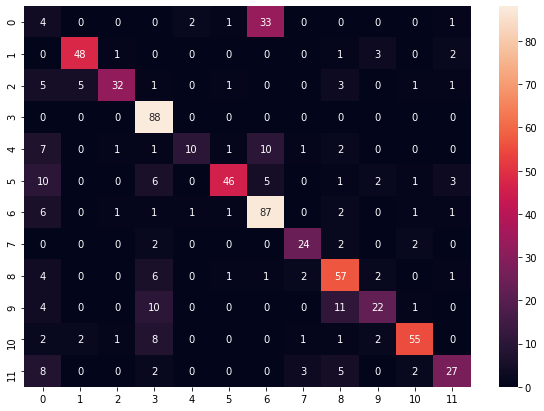

In [31]:
import seaborn as sns
df_cm = pd.DataFrame(cm, index = [i for i in range(0,12)],
                     columns = [i for i in range(0,12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [32]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.08      0.10      0.09        41
           1       0.87      0.87      0.87        55
           2       0.89      0.65      0.75        49
           3       0.70      1.00      0.83        88
           4       0.77      0.30      0.43        33
           5       0.90      0.62      0.74        74
           6       0.64      0.86      0.73       101
           7       0.77      0.80      0.79        30
           8       0.67      0.77      0.72        74
           9       0.71      0.46      0.56        48
          10       0.87      0.76      0.81        72
          11       0.75      0.57      0.65        47

    accuracy                           0.70       712
   macro avg       0.72      0.65      0.66       712
weighted avg       0.73      0.70      0.70       712



* Precision: Out of all the positive classes we have predicted correctly, how many are actually positive.
* Recall: Out of all the positive classes, how much we predicted correctly. It should be high as possible.
* F1-Score: F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution

### Visualize Predictions

Predicted label: Black-grass


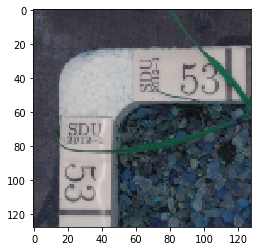

In [33]:
y_pred = encoder.inverse_transform(y_pred)
index = 2
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Common Chickweed


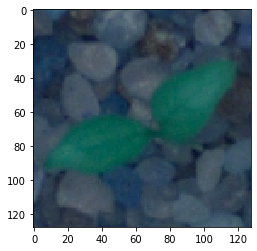

In [34]:
index = 3
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Common wheat


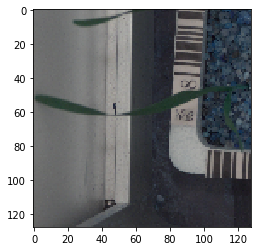

In [35]:
index = 36
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Small-flowered Cranesbill


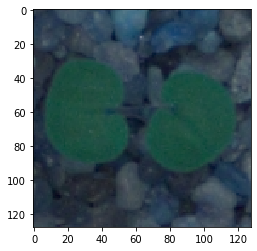

In [36]:
index = 59
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])